# 2장-미분과 적분
- 위키백과: TeX문법
https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:TeX_%EB%AC%B8%EB%B2%95#%EB%AF%B8%EB%B6%84 

## 2.1 함수의 극한과 연속

### 함수(fuction)
입력값을 출력값으로 바꾸어 출력하는 관계

In [3]:
# 함수 정의
def f(x):
    return 2 * x

# 함수 사용
x = 10
y = f(x)

print(f"x= {x} y= {y} ")
print('x=',x,' y=', y)

x= 10 y= 20 
x= 10  y= 20


### 연속과 불연속
함수의 값이 중간에 갑자기 변하는 것을 불연속(discontinuous)
그렇지 않으면 연속(continuous)

#### 불연속함수의 예

#### #부호함수

In [4]:
# numpy 라이브러리 설치하기
!pip install numpy 

In [6]:
import numpy as np

np.sign(-0.0001), np.sign(0), np.sign(0.0001)

(-1.0, 0, 1.0)

#### #단위계단함수

In [7]:
def heaviside_step(x):
    if isinstance(x, np.ndarray):
        return np.where(x >= 0, 1, 0)
    else:
        return 1.0 if x >= 0 else 0.0
    
heaviside_step(-0.0001), heaviside_step(0), heaviside_step(0.0001)
    

(0.0, 1.0, 1.0)

### 함수의 그래프

#### 1.그래프 라이브러리 설치하기

In [8]:
!pip install matplotlib 

#### 2.함수 정의하기
$f(x) = x^3 -3x^2 + x$

In [9]:
import numpy as np

# 함수 정의
def f(x):
    return x**3 - 3 * x**2 + x

# x, y 값
x = np.linspace(-1, 3, 9)   # 1차원 배열 (-1부터 3까지 9개의 간격으로)
y = f(x)

print(f'x     ->{x}')
print(f'y=f(x)->{y}')

x     ->[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
y=f(x)->[-5.    -1.375  0.    -0.125 -1.    -1.875 -2.    -0.625  3.   ]


#### 3.함수 그래프 그리기
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

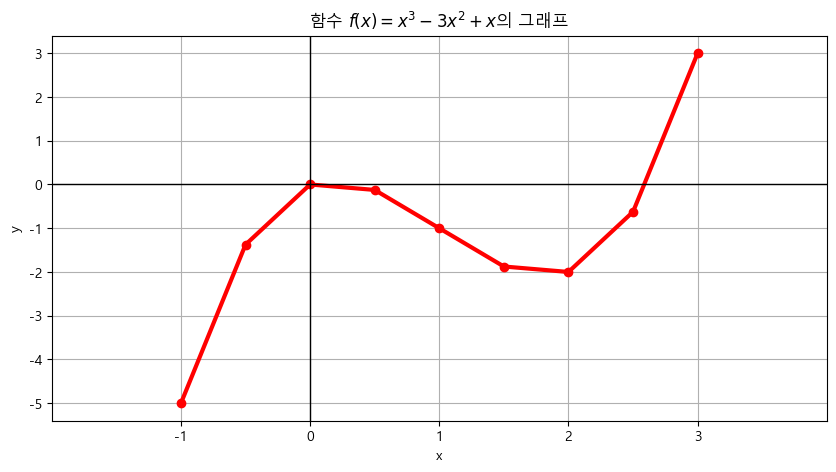

In [10]:
import matplotlib.pyplot as plt

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (10, 5) # 그래프(figure)의 크기, (가로,세로) 인치 단위
plt.rcParams['lines.linewidth'] = 3      # 선 두께
plt.rcParams['axes.grid'] = True 


# 그래프 그리기
plt.plot(x, y, 'ro-')   # x, y 값 그래프로 나타내기 
plt.xlim(-2, 4)         # x축 범위(한계)
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-1, 4))  # x축 눈금표시
plt.yticks(np.arange(-5, 4))  # y축 눈금표시
plt.axhline(y=0, color='black', linewidth=1)   # x축
plt.axvline(x=0, color='black', linewidth=1)   # y축
plt.title('함수 $f(x) = x^3 -3x^2 + x$의 그래프')
plt.grid(True)
plt.show()

#### 4. 그래프에서 특정 영역 표시하기

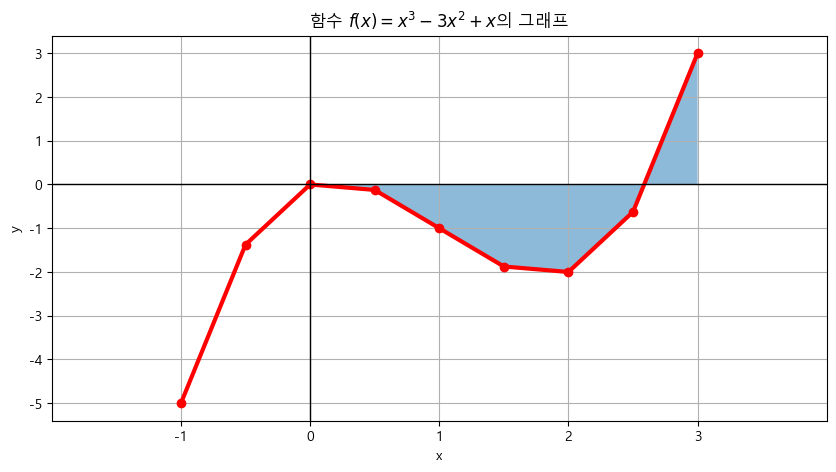

In [11]:
# 그래프 그리기
plt.plot(x, y, 'ro-')   # x, y 값 그래프로 나타내기 
plt.xlim(-2, 4)         # x축 범위(한계)
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-1, 4))  # x축 눈금표시
plt.yticks(np.arange(-5, 4))  # y축 눈금표시
plt.axhline(y=0, color='black', linewidth=1)   # x축
plt.axvline(x=0, color='black', linewidth=1)   # y축
plt.title('함수 $f(x) = x^3 -3x^2 + x$의 그래프')

# 그래프 영역 색칠하기
plt.fill_between(x[2:], y[2:], alpha=0.5)

plt.grid(True)
plt.show()

#### [연습] 부호함수와 단위계단함수 그래프 그리기

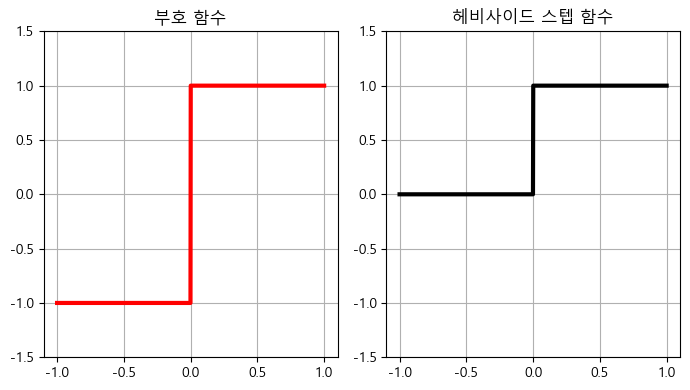

In [12]:
def heaviside_step(x):
    if isinstance(x, np.ndarray):
        return np.where(x >= 0, 1, 0)
    else:
        return 1.0 if x >= 0 else 0.0
    
x = np.linspace(-1, 1, 1000)

# 부호함수
sign = np.sign(x)
# 단위계단함수
step = heaviside_step(x)

# 그래프 그리기
plt.figure(figsize=(7,4))
plt.subplot(121)    # 1행 2열의 첫번째
plt.plot(x, sign, 'r-')
plt.title('부호 함수')
plt.ylim(-1.5, 1.5)

plt.subplot(122)    # 1행 2열의 두번째
plt.plot(x, step, 'k-')
plt.title('헤비사이드 스텝 함수')
plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()


### 역함수의 그래프
- 역함수의 그래프는 원래의 함수에서 x축과 y축이 바뀐 것
- y=x가 나타내는 직선을 대칭축으로 대칭인 함수의 그래프와 같다

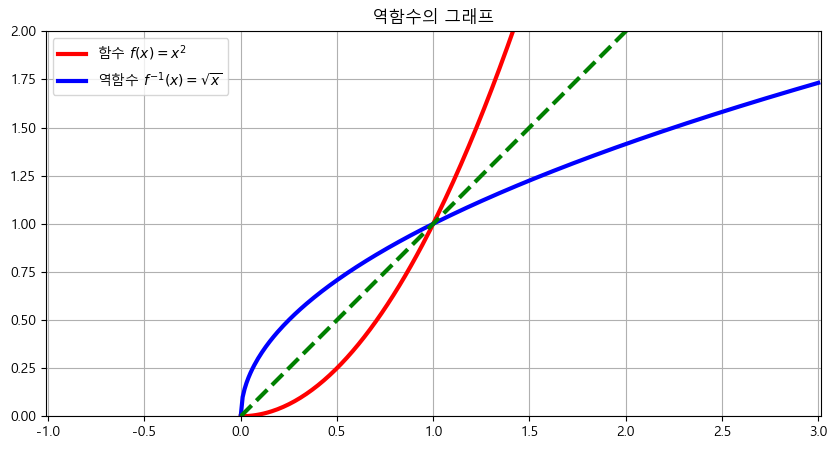

In [13]:
def f1(x):
    return x**2

def f1inv(x):
    return np.sqrt(x)

x = np.linspace(0, 3, 300)

plt.plot(x, f1(x), 'r-', label='함수 $f(x)=x^2$')
plt.plot(x, f1inv(x), 'b-', label='역함수 $f^{-1}(x)=\sqrt{x}$')
plt.plot(x, x, 'g--')
plt.axis('equal')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.legend()
plt.title('역함수의 그래프')
plt.show()

### 데이터 분석에서 많이 사용되는 함수
1. 다항식함수
2. 최대함수 최소함수
3. 지수함수
4. 로지스틱함수
5. 로그함수
6. 소프트플러스 함수
7. 다변수함수 (서피스 플롯 or 컨투어 플롯)
8. 분리 가능 다변수함수 (확률변수에서 중요함)
9. 다변수 다출력 함수 (소프트맥스 함수)

#### 1. 다항식(polynomial)함수
상수항, 일차항, 이차항 등의 거듭제곱 항의 선형조합으로 이루어진 함수
- f(x)=c0+c1x+c2x^2+...+cnx^n

#### 2. 최대(max)함수와 최소(min)함수 
- np.max(), np.maximum(), np.min()
- ReLU(Rectified Liniear Unit)함수: 
    보통 y=0으로 고정해서 입력값 x가 양수이면 그대로 출력하고 음수일 때 0으로 만들 때 주로 사용

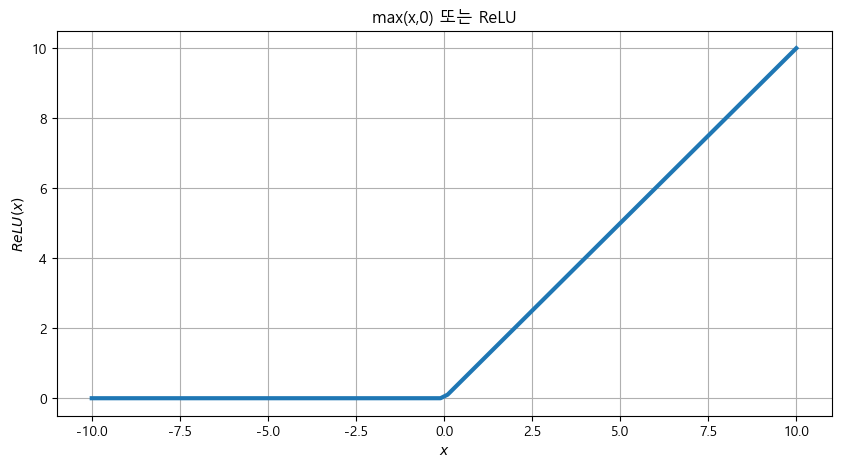

In [14]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, np.maximum(xx, 0))
plt.title('max(x,0) 또는 ReLU')
plt.xlabel('$x$')
plt.ylabel('$ReLU(x)$')
plt.show()

#### 3. 지수함수(Exponentioal function)
- y = $a^x$ 와 같이 어떤 갑을 입력갑으로 거듭제곱하여 출력을 구하는 함수에서 아래에 있는 수를 밑(base). 밑을 오일러 수 e(약 2.718)로 하여 거듭제곱하는 함수
- 넘파이에서 np.e는 오일러수, np.exp() 지수함수

In [15]:
np.e

2.718281828459045

In [16]:
np.exp(-10), np.exp(-1), np.exp(-0.1), np.exp(0), np.exp(0.1), np.exp(1), np.exp(10)

(4.5399929762484854e-05,
 0.36787944117144233,
 0.9048374180359595,
 1.0,
 1.1051709180756477,
 2.718281828459045,
 22026.465794806718)

In [17]:
# 두 지수함수의 곱의 값은 입력값 합의 지수함수값가 같다.
np.exp(2+3), np.exp(2) * np.exp(3)

(148.4131591025766, 148.4131591025766)

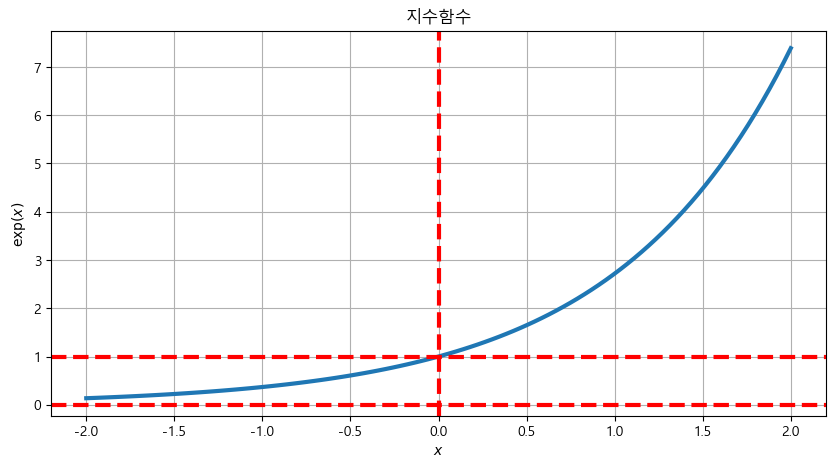

In [18]:
xx = np.linspace(-2, 2, 100)
yy = np.exp(xx)

plt.plot(xx, yy)
plt.title('지수함수')
plt.axhline(1, c='r', ls='--')
plt.axhline(0, c='r', ls='--')
plt.axvline(0, c='r', ls='--')
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')
plt.show()


#### 4.로지스틱 함수(Logistic fuction)
- 로지스틱 함수는 지수함수를 변형한 함수로 회귀분석이나 인공신경망에서 자주 사용됨
- 로지스틱함수는 원래 시그모이드 함수의 하나다. 하지만 시그모이드 함수 중에서는 로지스틱함수가 가장 널리 쓰이기 때문에 보통 시그모이드 함수라고 하면 이 로지스틱 함수를 뜻한다.
    * 시그모이드(sigmod) 함수: S자형 곡선 또는 시그모이드 곡선을 갖는 수학 함수

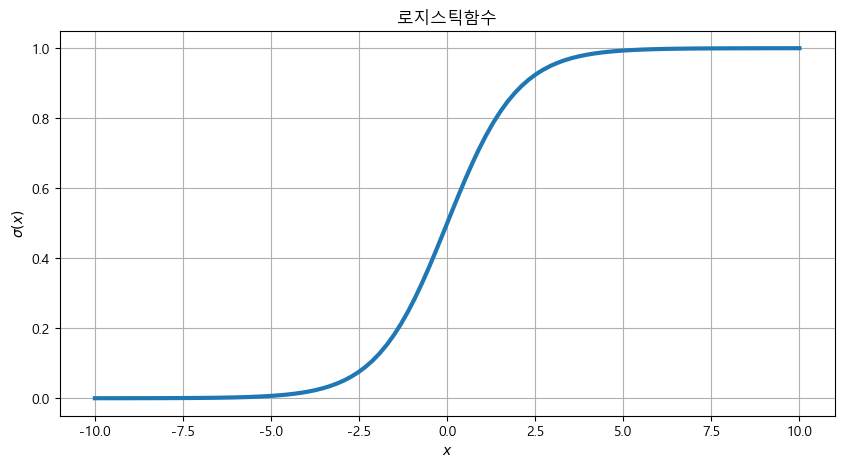

In [19]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

xx = np.linspace(-10, 10, 100)

plt.plot(xx, logistic(xx))
plt.title('로지스틱함수')
plt.xlabel('$x$')
plt.ylabel('$\sigma(x)$')
plt.show()

#### 5.로그함수
- e를 거듭제곱하여 특정한 수 a가 되도록 하는 수를 loga 라고 표기하고 로그라고 읽는다.
- 확률론에서 가장 많이 사용되는 함수

In [20]:
np.exp(2.3025851)

10.000000070059542

In [21]:
np.log(10)

2.302585092994046

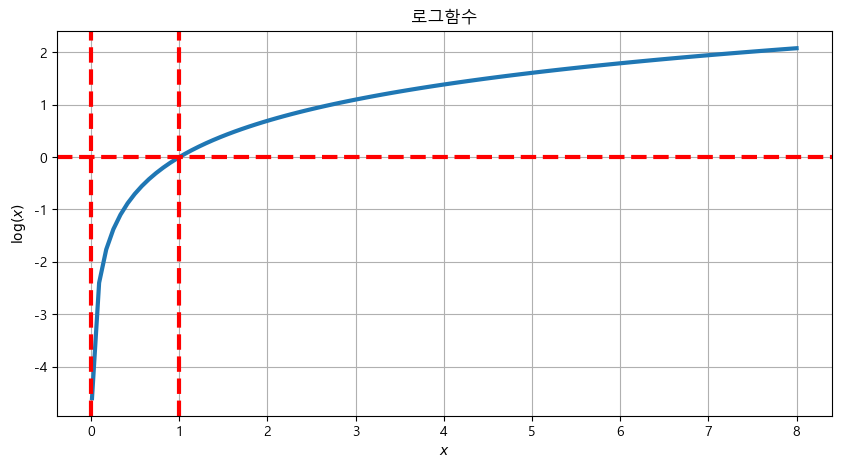

In [22]:
xx = np.linspace(0.01, 8, 100)

plt.plot(xx, np.log(xx))
plt.title('로그함수')
plt.axhline(0, c='r', ls='--')
plt.axvline(0, c='r', ls='--')
plt.axvline(1, c='r', ls='--')
plt.xlabel('$x$')
plt.ylabel('$\log(x)$')
plt.show()

#### #로그함수의 성질
 1. 로그함수는 곱하기를 더하기로 변환한다.
 - $log(x1*x2) = logx1 + logx2$
 - $log x^n = nlogx$

#### [문제] log2값은 약 0.69, log3값은 1.10이다. 이때 log 12값은?

In [23]:
# log12 = log(2^2 x 3) = log2 + log2 + log3=0.69x2+1.10 = 2.48
np.log(12)

2.4849066497880004

2.어떤 함수에 로그를 적용해도 함수의 최고점, 최저점의 위치는 변하지 않는다.
 - arg max f(x) = arg max logf(x)

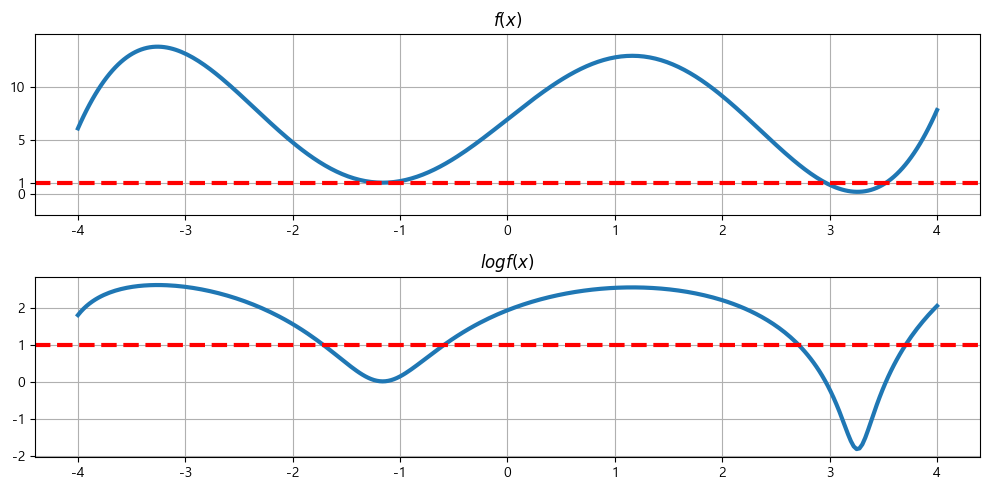

In [24]:
def ff(x):
    return x**3 - 12*x + 20 * np.sin(x) + 7

xx = np.linspace(-4, 4, 300)
yy = ff(xx)

plt.subplot(211)     # 2행 1열 첫번째
plt.plot(xx, yy)
plt.axhline(1, c='r', ls='--')
plt.yticks([0, 1, 5, 10])
plt.ylim(-2, 15)
plt.title('$f(x)$')

plt.subplot(212)     # 2행 1열 두번째
plt.plot(xx, np.log(yy))
plt.axhline(1, c='r', ls='--')
plt.title('$log f(x)$')

plt.tight_layout()
plt.show()

3.로그함수는 0~1사이의 작은 값을 확대시켜 보여준다.

[0.19356424 0.25224431 0.21259213 0.19217803 0.14942128]


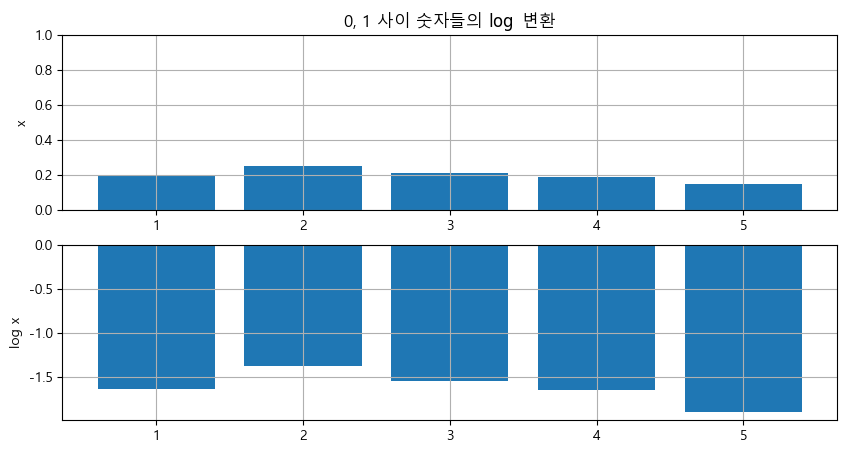

In [25]:
np.random.seed(0)
x = np.random.rand(5)
x = x / x.sum()
print(x)

plt.subplot(211)
plt.title('0, 1 사이 숫자들의 $\log$ 변환')
plt.bar(range(1,6), x)
plt.ylim(0, 1)
plt.ylabel('x')

plt.subplot(212)
plt.bar(range(1,6), np.log(x))
plt.ylabel('log x')

plt.show()

#### 6. 소프트플러스 함수(Softplus function)
- 지수함수와 로그함수를 결합하여 만든 하수
- 0을 인수로 갖는 최대함수와 비슷하지만 x=0 근처에서 값이 부드럽게 변한다

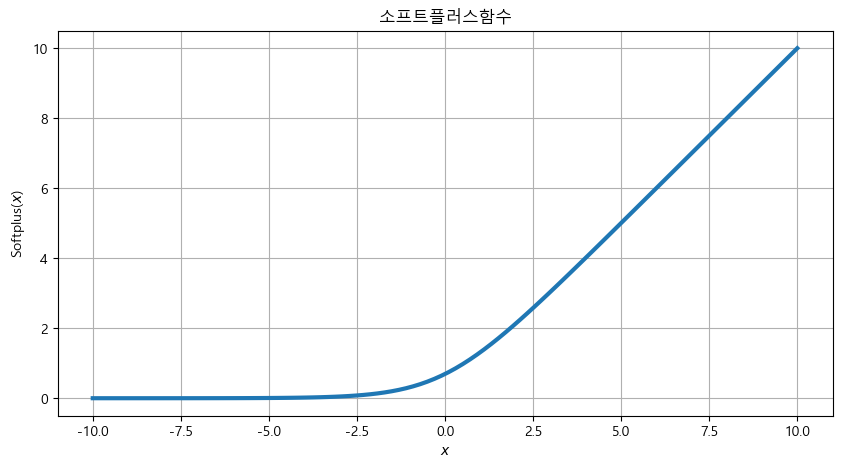

In [26]:
def softplus(x):
    return np.log(1 + np.exp(x))

xx = np.linspace(-10, 10, 100)

plt.plot(xx, softplus(xx))
plt.title('소프트플러스함수')
plt.xlabel('$x$')
plt.ylabel('Softplus($x$)')
plt.show()

#### 7. 다변수 함수(Multivariate function)
- 복수의 입력변수를 갖는 함수: z = f(x, y)
- 3차원 서피스 플롯(surface plot) 또는 컨투어 플롯(contour plot)으로 나타낼 수 있다.
- 3차원 자료를 시각화 하는 방법은 명암이 아닌 등고선(contour)를 사용하여 표현함 

#####  f(x, y) = $2x^2 + 6xy + 7y^2 - 26x - 54y + 107$

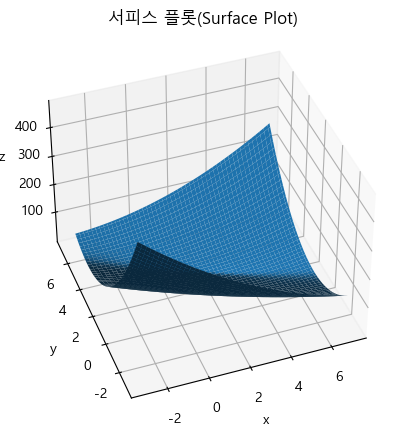

In [27]:
def f(x, y):
    return 2*x**2 + 6*x*y + 7*y**2 - 26*x - 54*y + 107

xx = np.linspace(-3, 7, 100)
yy = np.linspace(-3, 7, 100)
X, Y = np.meshgrid(xx, yy)
Z = f(X, Y)

fig = plt.figure()
#ax = fig.gca(projection='3d')  # warnning 발생시 아래 코드 사용
ax = fig.add_subplot(projection='3d')  # 
ax.plot_surface(X, Y, Z, linewidth=0.1)
ax.view_init(40, -110)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.title('서피스 플롯(Surface Plot)')
plt.show()

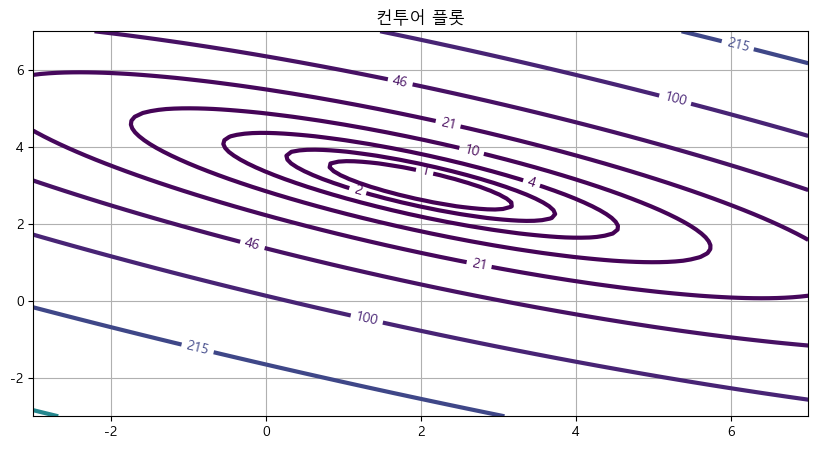

In [28]:
CS = plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10))
plt.clabel(CS, fmt='%d')
plt.title('컨투어 플롯')
plt.show()

#### 8. 분리 가능 다변수함수
- 다변수함수의 곱으로 표현 가능한 다변수함수
- $f(x,y) = f1(x)f2(y)$
- 2차원 함수에 대한 1차원 단변수함수는 3차원 공간상의 지형을 케이크 자르듯이 나눌 때 생기는 단면 모양과 같다. 그리고 분리 가능 다녑ㄴ수함수는 단면 모양이 모두 같다.

$g(x,y) = exp(-x^2 - 16y^2) = exp(-x^2)exp(-16y^2) = g1(x)g2(y)$

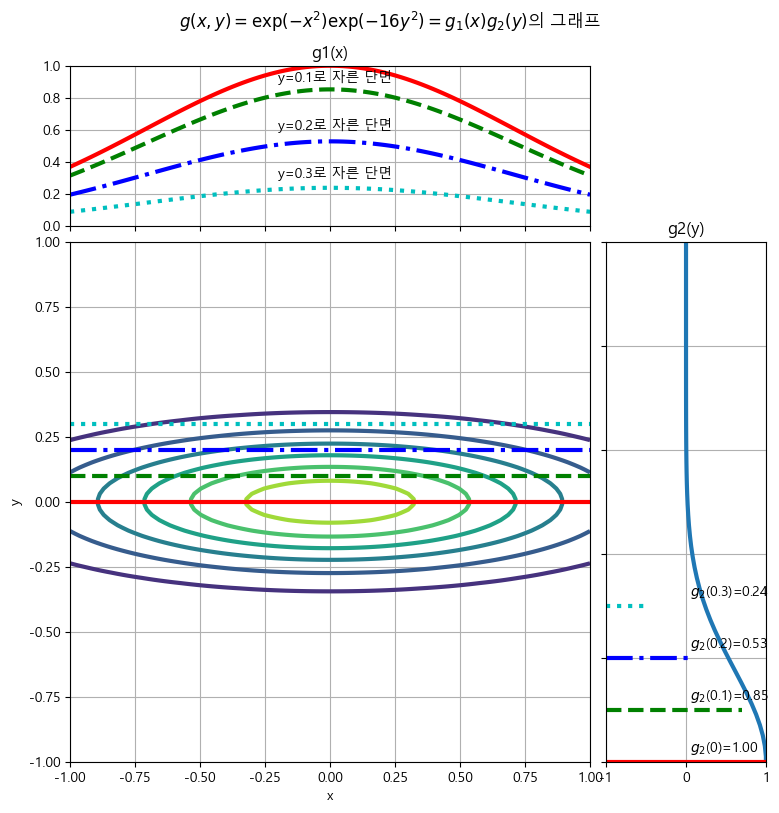

In [29]:
from matplotlib import transforms
from matplotlib.ticker import NullFormatter

def g1(x):
    return np.exp(-x ** 2)

def g2(y):
    return np.exp(-16 * y ** 2)

def g(x ,y):
    return g1(x) * g2(y)

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xx, yy)
Z = g(X, Y)

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02
rect  = [left, bottom, width, height]
rectx = [left, bottom_h, width, 0.2]
recty = [left_h, bottom, 0.2, height]

plt.figure(1, figsize=(8,8))
ax = plt.axes(rect)
axx = plt.axes(rectx)
axy = plt.axes(recty)

nullfmt = NullFormatter()
axx.xaxis.set_major_formatter(nullfmt)
axy.yaxis.set_major_formatter(nullfmt)

ax.contour(X, Y, Z)
ax.axhline(0, c='r', ls='-')
ax.axhline(0.1, c='g', ls='--')
ax.axhline(0.2, c='b', ls='-.')
ax.axhline(0.3, c='c', ls=':')
ax.set_xlabel('x')
ax.set_ylabel('y')

axx.plot(xx, g1(xx), c='r')
axx.plot(xx, g2(0.1)*g1(xx), c='g', ls='--')
axx.plot(xx, g2(0.2)*g1(xx), c='b', ls='-.')
axx.plot(xx, g2(0.3)*g1(xx), c='c', ls=':')         
axx.set_title('g1(x)')
axx.text(-0.2, 0.3, 'y=0.3로 자른 단면')
axx.text(-0.2, 0.6, 'y=0.2로 자른 단면')
axx.text(-0.2, 0.9, 'y=0.1로 자른 단면')

base = axy.transData
rot = transforms.Affine2D().rotate_deg(-90)
axy.plot(yy, g2(yy), transform=rot + base)
axy.set_title('g2(y)')
axy.axhline(0, xmax=g2(0), c='r', ls='-')
plt.text(0.05, 0.02, '$g_2$(0)={:.2f}'.format(g2(0)))
axy.axhline(0.1, xmax=g2(0.1), c='g', ls='--')
plt.text(0.05, 0.12, '$g_2$(0.1)={:.2f}'.format(g2(0.1)))
axy.axhline(0.2, xmax=g2(0.2), c='b', ls='-.')
plt.text(0.05, 0.22, '$g_2$(0.2)={:.2f}'.format(g2(0.2)))
axy.axhline(0.3, xmax=g2(0.3), c='c', ls=':')
plt.text(0.05, 0.32, '$g_2$(0.3)={:.2f}'.format(g2(0.3)))

axx.set_xlim(ax.get_xlim())
axx.set_ylim(0, 1)
axy.set_xlim(ax.get_ylim())
axy.set_ylim(0, 1)

plt.suptitle('$g(x,y) = \exp(-x^2)\exp(-16y^2) = g_1(x)g_2(y)$의 그래프', y=1.04)
plt.show()

#### 9. 다변수 다출력 함수 (Softmax function)
- 입력변수뿐 아니라 출력변수도 여러 개 일 경우 출력을 벡터나 행렬로 나타낼 수 있다.
- 소프트맥스(Softmax) 함수는 다차원 벡터를 입력받아 다차원 벡터를 출력한다.
- 출력 벡터는 다음과 같은 특성을 갖는다.
     - 모든 출력 원소는 0과 1 사이값을 갖는다.
     - 모든 출력 원소의 합은 1이다.
     - 입력 원소의 크기 순서와 출력 원소의 크기 순서가 같다.

- 소프트맥스함수는 다변수 입력을 확률처럼 보이게 출력한다.(이러한 특성 때문에 인공신경망의 마지막단계에서 출력을 조건부확률로 변형하는데 사용한다.)

In [30]:
def softmax(x, w): # x는 1차원 배열, w는 가중치 벡터
    e = np.exp(w * x)
    return np.exp(w * x) / e.sum()

x = [2.0, 1.0, 0.5]
y = softmax(x, np.ones(3))

print(y)
print(np.sum(y))

[0.62853172 0.2312239  0.14024438]
1.0


In [31]:
# 가중치가 커지면 최대값과 최소값의 차이가 더 벌어진다.
softmax(x, 4 * np.ones(3))   

array([0.97962921, 0.01794253, 0.00242826])

### 함수의 평행이동
- 함수를 그래프 상에서 오른쪽/왼쪽/상/하로 평행 이동할 때 함수식을 바꾸면 된다.
- 단변수함수를 그래프 상에서 오른쪽으로 a만큼 이동
     - $f(x)  -> f(x - a)$
     - $f(x) = x^2 + 2x -> f(x - 2) = (x - 2)^2 + 2(x - 2)$
- 단변수함수를 그래프 상에서 위로 b큼 이동
     - $f(x)  -> f(x) + b$     
- 다변수함수를 그래프 상에서 오른쪽으로 a만큼 위로 b만큼 이동
     - $f(x, y)  -> f(x - a, y - b)$     

##### 로지스틱함수를 오른쪽으로 5, 아래로 1만큼 이동

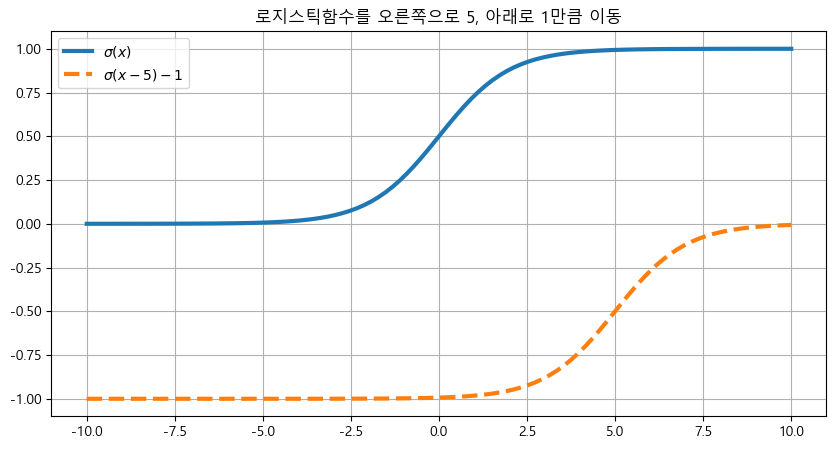

In [32]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, logistic(xx), label='$\sigma(x)$', ls='-')
plt.plot(xx, logistic(xx-5)-1, label='$\sigma(x-5)-1$', ls='--')
plt.legend()
plt.title('로지스틱함수를 오른쪽으로 5, 아래로 1만큼 이동')
plt.show()

##### 다변수함수를 그래프 상에서 오른쪽으로 a만큼 위로 b만큼 이동
$f(x, y)  -> f(x - a, y - b)$ 

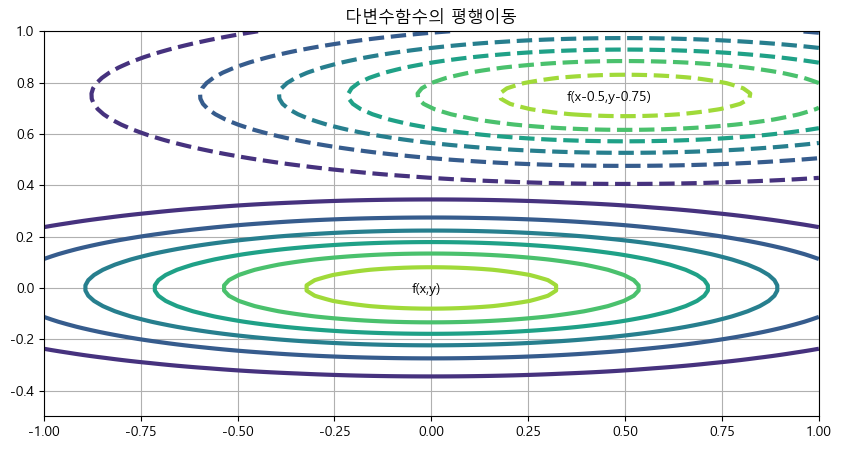

In [33]:
def g(x, y):
    return np.exp(-x ** 2 -16 * y ** 2)

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xx, yy)
Z1 = g(X, Y)
Z2 = g(X-0.5, Y-0.75)

plt.contour(X, Y, Z1)
plt.contour(X, Y, Z2, linestyles='--')
plt.text(-0.05, -0.02, 'f(x,y)')
plt.text(0.35, 0.73, 'f(x-0.5,y-0.75)')
plt.ylim(-0.5, 1)
plt.title('다변수함수의 평행이동')
plt.show()

### 함수의 스케일링
- 단변수함수를 x축 방향으로 a배만큼 늘리려면
    - $f(x) -> f(x/a)$
- 단변수함수를 y축 방향으로 b배만큼 늘리려면
    - $f(x) -> bf(x)$     

#### 로지스틱함수를 x축 방향으로 1/2배, y축 방향으로 2배 한다.

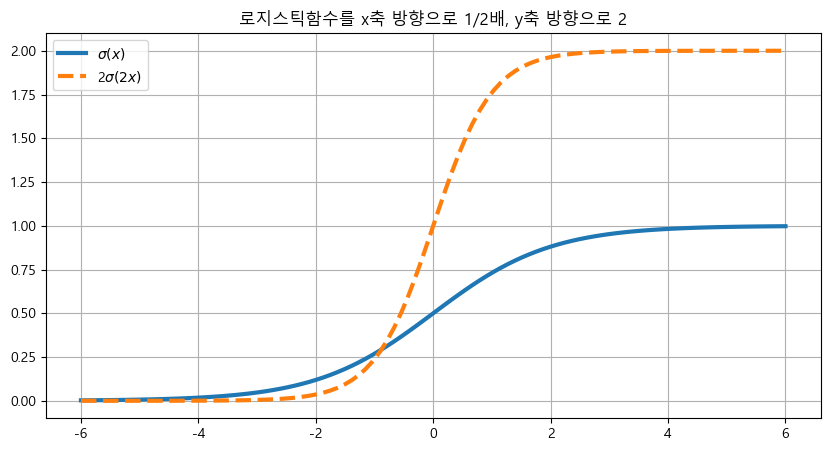

In [34]:
xx = np.linspace(-6, 6, 100)
plt.plot(xx, logistic(xx), label='$\sigma(x)$', ls='-')
plt.plot(xx, 2*logistic(2*xx), label='2$\sigma(2x)$', ls='--')
plt.legend()
plt.title('로지스틱함수를 x축 방향으로 1/2배, y축 방향으로 2')
plt.show()

-------

## 2.2 미분법

### 데이터 분석에 미분이 필요한 이유

### 예측 모형의 성능
- 데이터 분석의 목표: 예측 오차가 가장 적은 최적의 예측 모형을 구하는 것
- 예측 모형 함수의 계수(모수)를 바꾸어 최적의 예측 모형 찾는다    
- 성능은 크기를 비교할 수 있어야한다.
- 모수를 입력받아 오차 혹은 오류의 크기를 출력하는 함수를 가장 작게 하는 것
-->이런 함수를 목적함수라고 한다: 손실함수(loss function), 비용함수(cost function), 오차함수(error function)
- 최적화: 목적함수가 주어졌을 때 이 목적함수의 값을 가장 크게 혹은 적게 할 수 있는 입력값(모수)를 구하는 것
- 미분: 입력값이 변했을 때 함수의 출력값이 어떻게 달라지는지를 정량적으로 알아야 하는데 이 과정이 미분이다.   

##### [예제]
조절나사의 각도 x를 설정하여 출력되는 음량 y를 제어하는 앰프가 있을 때 <br>
--> 출력 음량(y)이 최대가 되는 조절나사의 각도(x)를 찾는 문제 에서 미분이 사용됨

### 기울기
- 수치적 최적화는 가장 적은 횟수로 여러 x값을 시도하여 최적의 값을 찾는 방법
- 변화율(y증감분/x증감분)에 따른 기울기(slope) 혹은 민감도(sensitivity)를 찾는 것

##### 3차 함수 그래프의 기울기 
$x^3 -3x^2 + x$
- 접점에서의 기울기 = 접점에서의 미분계수 ($3x^2 -6x + 1$)
- if x==0 일 때 기울기는 -->  1(빨간색 선)
- if x==1 일 때 기울기는 --> -2(초록색 선)

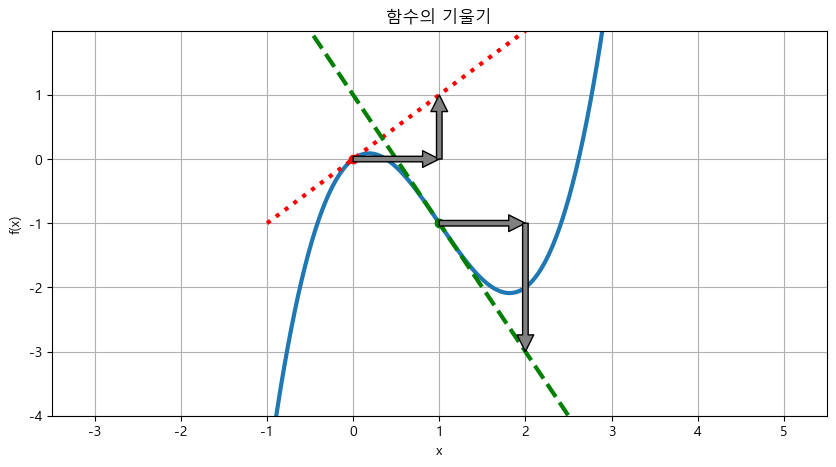

In [35]:
def f(x):
    return x**3 -3 * x**2 + x

x = np.linspace(-1, 3, 400)
y = f(x)

plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1,0), xytext=(0,0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1,1), xytext=(1,0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2,-1), xytext=(1,-1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2,-3), xytext=(2,-1), arrowprops=dict(facecolor='gray'))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('함수의 기울기')
plt.show()

### 수치미분
- scipy.misc 라이브러리의 derivative() 함수 사용하여 기울기 계산
- f: 기울기를 구하고자 하는 함수, x: 기울기를 구할 위치, dx: 기울기를 구하기 위해 이동할 거리

#### [연습문제] x의 기울기는?
- 위 그래프에서 x값들에 대한 기울기는 얼마일까? <br>

x:slope -> 
{-0.5:2.5,
    0:  1,
  0.5: -1,
    1: -2,
  1.5: -1,
    2:  1,
  2.5: 2.5}

In [36]:
def f(x):
    return x**3 - 3 * x**2 + x

from scipy.misc import derivative
print(derivative(f, 0, dx=1e-6))   # 1/1,000,000 (1/백만)
print(derivative(f, 1, dx=1e-6))

X = [-0.5,0,0.5,1,1.5,2,2.5]
Y = []
for x in X: 
    print(f'x={x:.1f}, derivative={derivative(f, x, dx=1e-6):.1f}')
    Y.append(derivative(f, x, dx=1e-6))

1.000000000001
-2.000000000002
x=-0.5, derivative=4.7
x=0.0, derivative=1.0
x=0.5, derivative=-1.2
x=1.0, derivative=-2.0
x=1.5, derivative=-1.3
x=2.0, derivative=1.0
x=2.5, derivative=4.7


C:\Users\yswoo\AppData\Local\Temp\ipykernel_18212\883776507.py:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  print(derivative(f, 0, dx=1e-6))   # 1/1,000,000 (1/백만)
C:\Users\yswoo\AppData\Local\Temp\ipykernel_18212\883776507.py:6: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  print(derivative(f, 1, dx=1e-6))
C:\Users\yswoo\AppData\Local\Temp\ipykernel_18212\883776507.py:11: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github

### 미분 (differentiation)
- 어떤 함수로부터 그 함수 기울기를 출력하는 새로운 함수를 만들어 내는 작업
- 미분으로 만들어진 함수를 원래 함수의 도함수(derivative)라고 한다.
- 수렴(converge)과 극한(limit) 개념을 사용하여 미분 정의함
- f'(x) 프라임 기호를 붙혀 사용. d/dx(f)

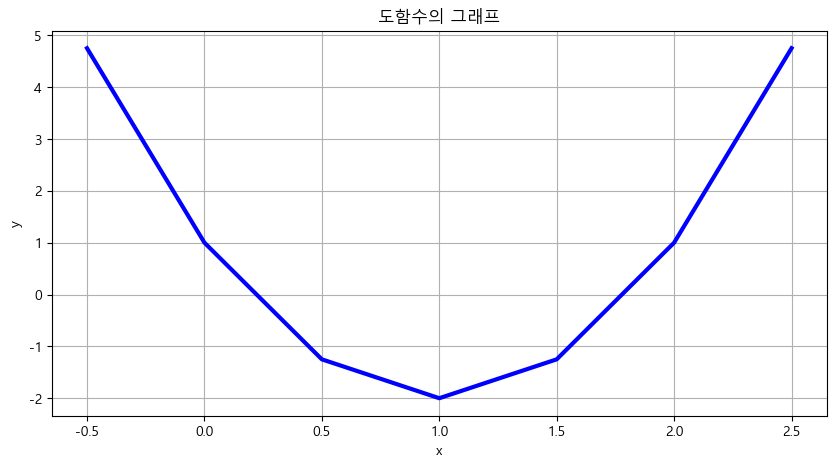

In [37]:
plt.title('도함수의 그래프')
plt.plot(X, Y, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 미분 가능
- 함수에서 어떤 점에서는 기울기를 정의하기 어려울 수가 있다. 
- 기울기를 정의할 수 있으면 미분가능, 정의하기 어려우면 미분 불가능이라고 한다.

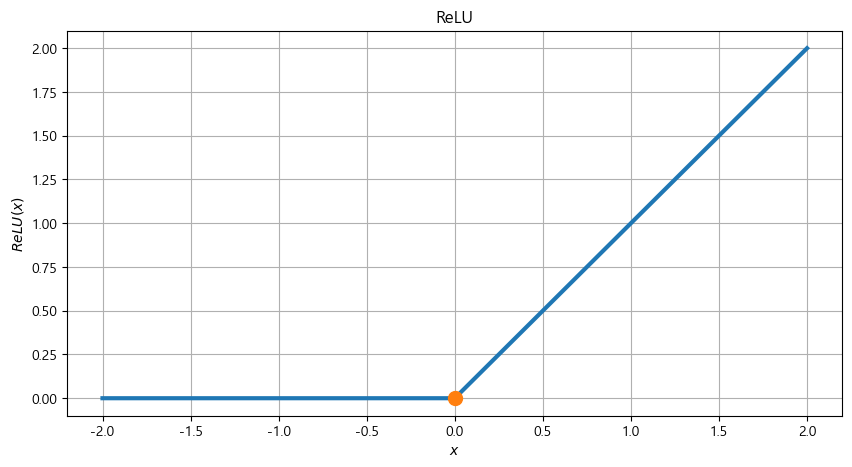

In [38]:
def relu(x):
    return np.where(x>0, x, 0)

xx = np.linspace(-2, 2, 100)
plt.plot(xx, relu(xx))
plt.plot(0, 0, marker='o', ms=10)
plt.title('ReLU')
plt.xlabel('$x$')
plt.ylabel('$ReLU(x)$')
plt.show()

### 미분 공식
- 기본 미분 공식<br>
: 거듭제곱 이용 $\frac{d}{dx}(x^n) = nx^{n-1} $ 
- 선형조합법칙<br>
  어떤 함수에 각각 상수를 곱한 후 더한 선형조합은 각 함수의 도함수를 선형조합한 것과 같다.
  $\frac{d}{dx}(c_1f_1+c_2f_2)= c_1\frac{df_1}{dx} + c_2\frac{df_2}{dx} $
  
- 곱셈법칙
- 연쇄법칙<br>
: 두 함수  $y=f(u)와 u=g(x)$가 각각 미분가능하면 합성함수 $y=f(g(x))$도 미분가능하다 

#### 1.기본 미분 공식

#### [예제]  도함수 구하기
$ y = 1 + 2x + 3x^2 + 4exp(x) + 5log(x)$ -->   <br>


--> 도함수 <br>
$ \frac{dy}{dx} = 2 + 6x + 4exp(x) + \frac{5}{x} $

#### 2.선형조합법칙

#### [예제] 도함수 그래프 그리기
$ f(x) = x^3 -3x^2 + x $ --> <br>
$ f'(x) = 3x^2 -6x + 1 $


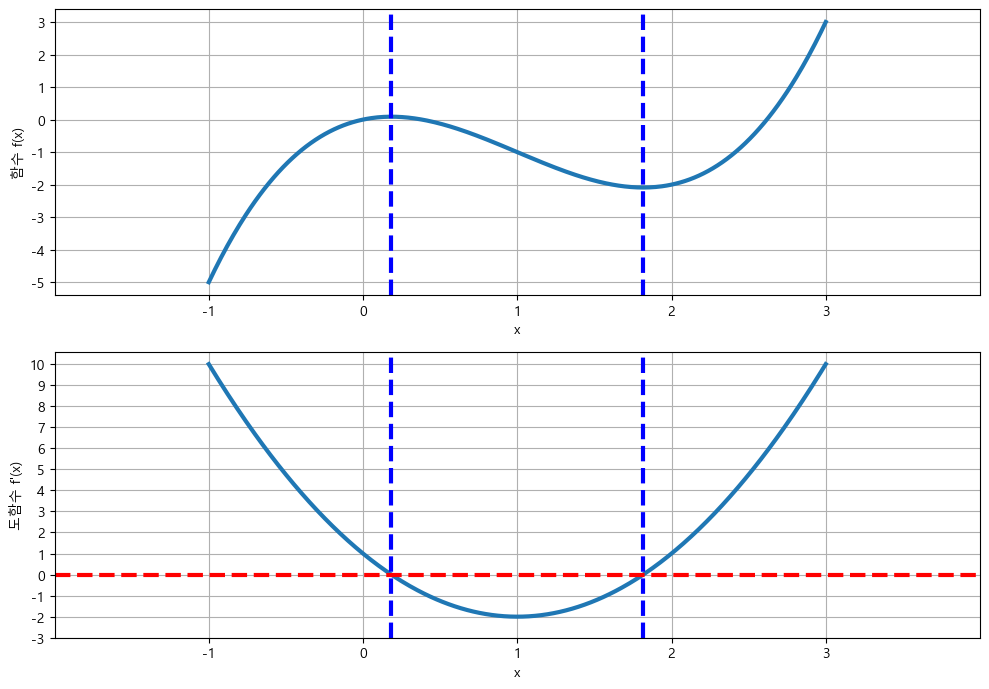

In [39]:
def f(x):
    return x**3 - 3 * x**2 + x

def fprime(x):
    return 3*x**2 - 6*x + 1

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1])

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 7))

plt.subplot(211)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.xlabel('x')
plt.ylabel('함수 f(x)')
plt.axvline(x1, c='b', ls='--')
plt.axvline(x2, c='b', ls='--')

plt.subplot(212)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.xlabel('x')
plt.ylabel("도함수 f'(x)")
plt.axhline(0, c='r', ls='--')
plt.axvline(x1, c='b', ls='--')
plt.axvline(x2, c='b', ls='--')

plt.tight_layout()
plt.show()

#### 3.곱셈법칙
- 어떤 함수의 형태가 두 함수를 곱한 것과 같을 때, 각 개별 함수의 도함수를 사용하여 원래 함수의 도함수를 구한다.
$\frac{d}{dx}(f.g) = f \frac{dg}{dx}+\frac{df}{dx}g$
- 함수 $y = e^x$은 모든 실수에서 미분가능하며, $(e^x)'=e^x$
- 함수 $y = lnx$는 $x>0$에서 미분가능하며, $(lnx)'=\frac{1}{x}$

#### [예제] 함수를 미분하시오.
$f = xe^x$

--> 도함수
$\frac{df}{dx} = xe^x + e^x$

#### 4. 연쇄법칙
- 미분하고자 하는 함수의 입력 변수가 다른 함수의 출력 변수인 경우 적용하는 방법 <br>
$f(x) = h(g(x))$ --> $\frac{df}{dx}=\frac{dh}{dg}.\frac{dg}{dx} $


#### [예제] 정규분포의 확률밀도함수 도함수 구하기
$f = exp\frac{(x - u)^2}{\sigma^2}$

--> 도함수 구하기 <br>
$f = exp(z),   z=\frac{y^2}{\sigma^2},   y=(x - u)^2$ <br>
=> 연쇄법칙 적용 <br>
$\frac{df}{dx} = \frac{df}{dz}.\frac{dz}{dy}.\frac{dy}{dx}$  <br>
- $\frac{df}{dx} = exp(z) = exp\frac{(x - u)^2}{\sigma^2}$ <br>
- $\frac{dz}{dy} = \frac{2y}{\sigma^2} = \frac{2(x - u)}{\sigma^2}$ <br>
- $\frac{dy}{dx} = 1$  <br>

최종 결과 <br>
$\frac{df}{dx} = \frac{2(x - u)}{\sigma^2}exp\frac{(x - u)^2}{\sigma^2}$


### 2차 도함수
- 도함수를 한 번 더 미분하여 만들어진 함수를 2차 도함수라고 한다.

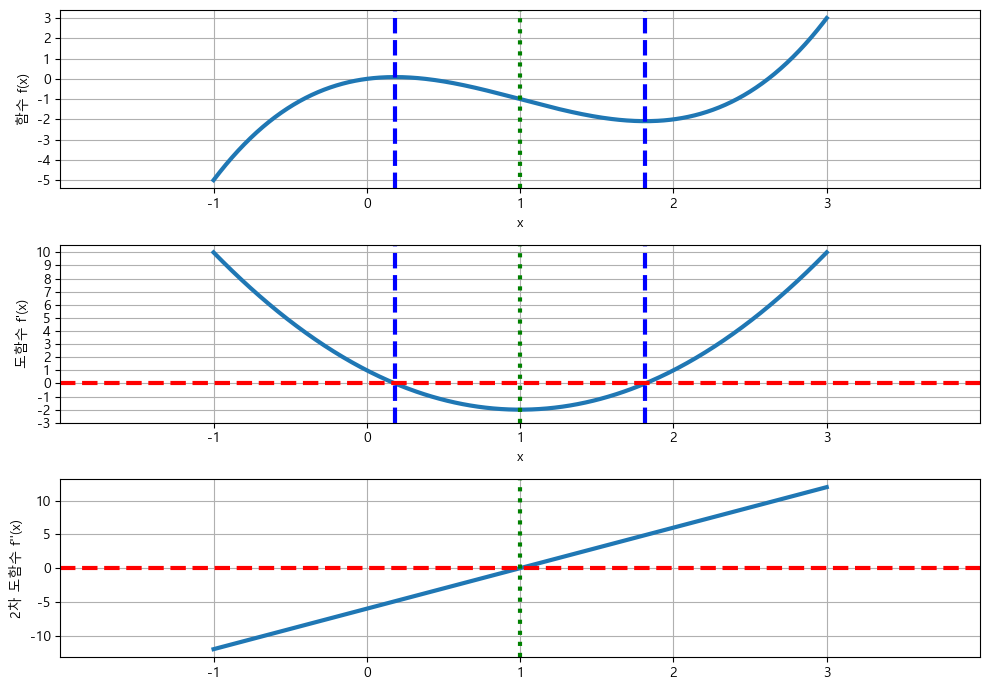

In [40]:
def f(x):
    return x**3 - 3 * x**2 + x

def fprime(x):
    return 3*x**2 - 6*x + 1

def fprime2(x):
    return 6*x - 6

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1])

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 7))

plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.xlabel('x')
plt.ylabel('함수 f(x)')
plt.axvline(x1, c='b', ls='--')
plt.axvline(x2, c='b', ls='--')
plt.axvline(1, c='g', ls=':')

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.xlabel('x')
plt.ylabel("도함수 f'(x)")
plt.axhline(0, c='r', ls='--')
plt.axvline(x1, c='b', ls='--')
plt.axvline(x2, c='b', ls='--')
plt.axvline(1, c='g', ls=':')

plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.ylabel("2차 도함수 f''(x)")
plt.axhline(0, c='r', ls='--')
plt.axvline(1, c='g', ls=':')

plt.tight_layout()
plt.show()

### 편미분
- 만약 함수가 둘 이상의 독립변수를 가지는 다변수함수인 경우에는 기울기는 하나의 변수에 대해서만 구할 수 있다.
- 따라서 편미분의 결과로 하나의 함수에 여러 도함수가 나올 수 있다.
- 어떤 하나의 독립변수에 대해 미분할 때는 다른 독립변수를 상수로 생각하면 된다. <br>
$f_x(x,y) = \frac{\partial f}{\partial x}$ <br>
$f_y(x,y) = \frac{\partial f}{\partial y}$

#### [예제] 편미분하기
$f(x,y) = x^2 + 4xy + 4y^2 $

-> 도함수 구하기 <br>
$f_x(x,y) = 2x + 4y $ <br>
$f_y(x,y) = 4x + 8y $

--> 2차 편미분(도함수 구하기) <br>
$f_{xx}(x,y) = 2 $ <br>
$f_{yy}(x,y) = 8 $ <br>
$f_{xy}(x,y) = 4 $ <br>
$f_{yx}(x,y) = 4 $ <br>

#### [연습문제] 편미분을 구하기
다음 함수에 대한 1차/2차 편미분 $f_x,f_y,f_{xx},f_{xy},f_{yx},f_{y}$를 구하라.<br>
$f(x,y) = exp(x^2+2y^2)$

--> 편미분 결과 <br>
$f_x = 2xexp(x^2+2y^2)$ <br>
$f_y = 4yexp(x^2+2y^2)$ <br>
$f_{xx} = (4x^2+2)exp(x^2+2y^2$ <br>
$f_{xy} = 8xyexp(x^2+2y^2$ <br>
$f_{yx} = 8xyexp(x^2+2y^2$ <br>
$f_{yy} = (16y^2+4)exp(x^2+2y^2$ <br>

### 심파이(Sympy) 사용방법
- 심파이는 심볼릭 연산(Symbolic operation)을 지원하는 패키지
- 심볼릭 연산이란 사람이 연필로 계산하는 것과 동일한 형태의 연산을 말함
- 머신러닝 딥러닝 등에서 많이 사용됨

#### Sympy 라이브러리 설치

In [41]:
!pip install sympy

In [42]:
import sympy

# 주피터 노트북에서 수학식의 LaTex 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')

#### 심볼릭 변수

In [43]:
x = sympy.symbols('x')
x

x

In [44]:
type(x)

sympy.core.symbol.Symbol

In [45]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

#### diff()로 미분하기

In [46]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

#### simplify() 사용하여 소인수분해로 수식정리하기

In [47]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

#### 편미분을 하는 경우
어떤 변수로 미분하는지 diff()함수에 명시함

In [48]:
x, y = sympy.symbols('x y')
f = x**2 + 4*x*y + 4*y**2
f

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [49]:
sympy.diff(f, x)

2⋅x + 4⋅y

In [50]:
sympy.diff(f, y)

4⋅x + 8⋅y

##### 상수 심볼를 포함하는 한수를 미분하는 경우

In [51]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x-mu)**2 / sigma**2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [52]:
sympy.diff(f, x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [53]:
sympy.simplify(sympy.diff(f, x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

#### 이차 도함수 구하는 방법

In [54]:
sympy.diff(f, x, x)

                           2
                    (μ - x) 
                    ────────
  ⎛             2⎞      2   
  ⎜    2⋅(μ - x) ⎟     σ    
2⋅⎜1 + ──────────⎟⋅ℯ        
  ⎜         2    ⎟          
  ⎝        σ     ⎠          
────────────────────────────
              2             
             σ              

### [연습문제] 심파이를 사용하여 다음 함수를 미분한 도함수를 구하라.
1. $ f(x) = x^3 - 1 $

In [55]:
x = sympy.symbols('x')
f = x**3 - 1
sympy.diff(f)

   2
3⋅x 

2. $f(x) = log(x^2 - 3k) $

In [56]:
x, k = sympy.symbols('x k')
f = sympy.log(x**2 - 3*k)
sympy.diff(f, x)

   2⋅x   
─────────
        2
-3⋅k + x 

3. $f(x) = exp(ax^b)$

In [57]:
x, a, b = sympy.symbols('x a b')
f = sympy.exp(a*x**b)
sympy.simplify(sympy.diff(f, x))

               b
     b - 1  a⋅x 
a⋅b⋅x     ⋅ℯ    

### [연습문제] 심파이를 사용하여 다음 함수에 대한 편미분 $f_x,f_y,f_{xx},f_{xy},f_{yx},f_{y}$를 구하라.
$f(x,y) = exp(x^2+2y^2)$ 


In [58]:
x, y = sympy.symbols('x y')
f = sympy.exp(x**2 + 2*y**2)

# f_x
sympy.diff(f, x)

      2      2
     x  + 2⋅y 
2⋅x⋅ℯ         

In [59]:
# f_y
sympy.diff(f, y)

      2      2
     x  + 2⋅y 
4⋅y⋅ℯ         

In [60]:
# f_xx
sympy.diff(f, x, x)

               2      2
  ⎛   2    ⎞  x  + 2⋅y 
2⋅⎝2⋅x  + 1⎠⋅ℯ         

In [61]:
# f_xy
sympy.diff(f, x, y)

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [62]:
# f_yx
sympy.diff(f, y, x)

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [63]:
# f_yy
sympy.diff(f, y, y)

               2      2
  ⎛   2    ⎞  x  + 2⋅y 
4⋅⎝4⋅y  + 1⎠⋅ℯ         

---------

## 2.3 적분법

- 미분과 반대되는 개념
- 부정적분(indefinite integral), 정적분(definite integral)로 구분

### 부정적분
- 부정적분은 정확하게 미분과 반대되는 개념. 즉, 반미분(anti-derivative)
- 도함수에 대한 미분되기 전의 원래 함수 (원시함수)를 찾는 과정 또는 결과
- $\frac{dF(x)}{dx} = f(x) <-> F(x) = \int f(x)dx + C $
- dx: x라는 변수로 적분했다것을 나타내는 기호
- C: 상수항

### 심파이를 이용한 부정적분

In [64]:
import sympy

sympy.init_printing(use_latex='mathjax')

x = sympy.symbols('x')
f = x * sympy.exp(x) + sympy.exp(x)
f

   x    x
x⋅ℯ  + ℯ 

In [65]:
sympy.integrate(f)

   x
x⋅ℯ 

In [66]:
x, y = sympy.symbols('x y')
f = 2*x + y
f

2⋅x + y

In [67]:
sympy.integrate(f, x)

 2      
x  + x⋅y

#### [연습문제] 심파이를 이용하여 다음 부정적분을 구하라.
1. $\int 3x^2dx $

In [68]:
import sympy

sympy.init_printing(use_latex='mathjax')

x, y = sympy.symbols('x y')

In [69]:
f = 3 * x**2
sympy.integrate(f)

 3
x 

2. $\int (3x^2 -6x + 1)dx$

In [70]:
f = 3*x**2 - 6*x + 1
sympy.integrate(f)

 3      2    
x  - 3⋅x  + x

3. $\int(2+ 6x + 4exp(x) + \frac{5}{x})dx$

In [71]:
f = 2 + 6*x + 4*sympy.exp(x) + 5/x
sympy.integrate(f)

   2            x           
3⋅x  + 2⋅x + 4⋅ℯ  + 5⋅log(x)

4. $\int \frac{2x}{x^2 -1} dx$

In [72]:
f = 2*x / (x**2 -1)
sympy.integrate(f)

   ⎛ 2    ⎞
log⎝x  - 1⎠

5. $\int (1 + xy) dx$

In [73]:
f = 1 + x*y
sympy.integrate(f, x)

 2      
x ⋅y    
──── + x
 2      

6. $\int xyexp(x^2 + y^2)dx$

In [74]:
f = x*y*sympy.exp(x**2+y**2)
sympy.integrate(f, x)

    2    2
   x  + y 
y⋅ℯ       
──────────
    2     

7. $\int \int xyexp(x^2+y^2)dxdy$

In [75]:
f = x*y*sympy.exp(x**2+y**2)
l = sympy.integrate(f, x)
sympy.integrate(l, y)

  2    2
 x  + y 
ℯ       
────────
   4    

### 정적분
- 정적분은 독립변수 x가 어떤 구간 [a, b] 사이일 때 그 구간에서 함수 f(x)의 값과 수평선(x축)이 이루는 면적을 구하는 행위 또는 그 값.
- $\int_{a}^{b} f(x)dx$ = F(b) - F(a)

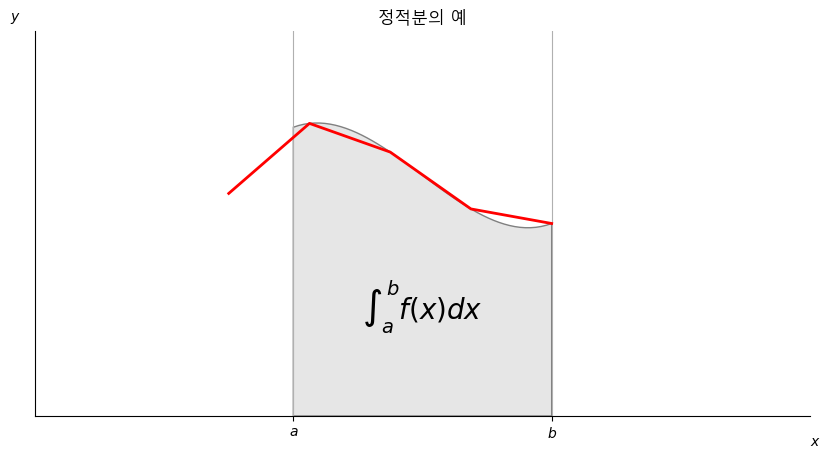

In [76]:
from matplotlib.patches import Polygon

def f(x):
    return x**3 - 3*x**2 + x + 6

a, b = 0, 2
x = np.linspace(a-0.5, b+0,5, 50)
y = f(x)

ax = plt.subplot(111)
plt.title('정적분의 예')
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(bottom=0)
ix = np.linspace(a, b)
iy = f(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5*(a+b), 0.2*(f(a)+f(b)), r'$\int_a^b f(x)dx$',
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks((a, b))     
ax.set_xticklabels(('$a$', '$b$'))  
ax.set_yticks([])  
ax.set_xlim(-2, 4)
ax.set_ylim(0, 8)
plt.show()

#### [예제] 심파이로 정적분 구하기
$\int_{0}^{2}(x^3 -3x^2 + x + 6)dx $

In [77]:
x, y = sympy.symbols('x y')
f = x**3 -3*x**2 + x + 6
f

 3      2        
x  - 3⋅x  + x + 6

In [78]:
# 부정적분
F = sympy.integrate(f)
F

 4         2      
x     3   x       
── - x  + ── + 6⋅x
4         2       

In [79]:
# 정적분 계산하기
(F.subs(x, 2) - F.subs(x, 0)).evalf()

10.0000000000000

### 수치적분 (numerical integration)
- 수치적분은 함수를 아주 작은 구간을 나누어 실제 면적을 계산함으로써 정적분의 값을 구하는 방법
- 사이파이(Scipy)의 integrate 서브패키지의 quad() 명령으로 구할 수 있음

In [80]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [81]:
#import scipy
from scipy import integrate

def f(x):
    return x**3 -3*x**2 + x + 6

integrate.quad(f, 0, 2)  # 정적분(수치적분)

(10.0, 1.1102230246251565e-13)

#### [연습문제] 다음 정적분의 값을 부정적분과 수치적분 두 가지 방법으로 구하라
1. $\int_{0}^{1}(3x^2 -6x + 1)dx$

In [82]:
#부정적분
f = 3*x**2 - 6*x + 1
F = sympy.integrate(f)
print(F)
print((F.subs(x,1) - F.subs(x,0)).evalf())

x**3 - 3*x**2 + x
-1.00000000000000


In [84]:
#수치적분
def f(x):
    return 3*x**2 - 6*x + 1

integrate.quad(f, 0, 1)

(-1.0, 1.3085085171449517e-14)

2. $\int_{1}^{10}(2 + 6x + 4exp(x) +\frac{5}{x})dx$

In [87]:
#부정적분
f = 2 + 6*x + 4*sympy.exp(x) + 5/x
F = sympy.integrate(f)
print(F)
print((F.subs(x,10) - F.subs(x,1)).evalf())

3*x**2 + 2*x + 4*exp(x) + 5*log(x)
88421.5029773780


In [88]:
#수치적분
def f(x):
    return 2 + 6*x + 4*sympy.exp(x) + 5/x

integrate.quad(f, 1, 10)

(88421.50297737827, 1.5276890734473385e-06)

### 다변수 정적분
- $\int_{y=c}^{y=d} \int_{x=a}^{x=b} f(x,y)dxdy$

#### [예제] 정적분으로 함수의 부피를 구하는 모습을 시각화 하기
x=2 ~ x=8, y=0 ~ y=6 까지의 정사각형 영역에서 정적분으로 함수의 부피 구하기
- $\int_{y=0}^{y=6} \int_{x=2}^{x=8} (x^2 -10x + y + 50)dxdy$

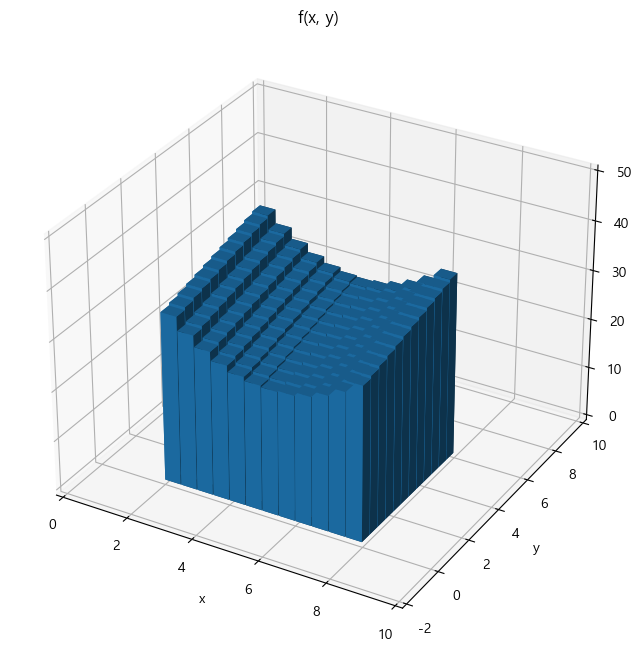

In [89]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
_x = np.arange(12) / 2 + 2
_y = np.arange(12) / 2
X, Y = np.meshgrid(_x, _y)
x, y = X.ravel(), Y.ravel()
z = x*x - 10*x + y + 50
z0 = np.zeros_like(z)
ax.bar3d(x, y, z0, 0.48, 0.48, z)
ax.set_xlim(0, 10)
ax.set_ylim(-2, 10)
ax.set_zlim(0, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('f(x, y)')
plt.show()

#### 사이파이 이용하여 수치이중적분하기
- dblquad(func, a, b, gfun, hfun)
- gfun:y하한, hfun:y상한

In [90]:
def f(x, y):
    return x*x - 10*x + y + 50

print(integrate.dblquad(f, 2, 8, 0, 6))
integrate.dblquad(f, 2, 8, lambda x:0, lambda x: 6)

(1332.0000000000002, 1.4788170688007088e-11)


(1332.0000000000002, 1.4788170688007088e-11)

#### [예제] 사이파이로  정적분 값을 수치적분으로 구하라
- $\int_{0}^{\infty} \int_{1}^{\infty} \frac{exp(-xy)}{y^2}dxdy$

In [91]:
def f(x, y):
    return np.exp(-x*y) / y**2

integrate.dblquad(f, 1, np.inf, lambda x:0, lambda x: np.inf)

(0.4999999999999961, 1.0684538743334288e-08)

#### [연습문제] 정적분 값을 수치적분으로 구하라
- $\int_{-1}^{1} \int_{-1}^{1} (1 + xy)dxdy$

In [93]:
def f(x, y):
    return 1 + (x*y)

integrate.dblquad(f, -1, 1, lambda x:-1, lambda x: 1)

(4.0, 4.440892098500626e-14)

---------------------------------